In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [376]:
import numpy as np
import cv2 as cv
import math

In [470]:

per_noisy_samples=10
num_distinct_characters = 260
dim = 48
path = 'current_dataset/'
file_extension = '.tiff'
x_data = []


for i in range(num_distinct_characters):
#     if((i%62==0 or i%63==0 or i%64==0) and i!=0):
#         continue
    filename = path+'char_'+str(i+1)+file_extension 
    img = cv.imread(filename, 0)
    canvas = np.ones((dim,dim)) * 255
    row, col = img.shape
    if(col>=dim):
        img = img = cv.resize(img, dsize=(row,dim), interpolation=cv.INTER_CUBIC)
        
    row_start = int(0.5*(dim - row))
    col_start = int(0.5*(dim - col))
    try:
        canvas[row_start:row_start+row, col_start:col_start+col] = img
        img = canvas
    except:
        print(img.shape)
        print(filename)
        
    img = img = cv.resize(img, dsize=(dim,dim), interpolation=cv.INTER_CUBIC)
    ret,img = cv.threshold(img,127, 255, cv.THRESH_BINARY)
    for j in range(per_noisy_samples):
        x_data.append(img)
x_data = np.asarray(x_data)

x_data = x_data.astype('float32') / 255.
x_data = np.reshape(x_data, (len(x_data), dim, dim, 1))
#x_data = np.clip(x_data, 0.5, 1.)
print('x_data shape: '+str(x_data.shape))
print(canvas.shape)

(48, 22)
current_dataset/char_104.tiff
x_data shape: (2600, 48, 48, 1)
(48, 48)


In [471]:
filename = []
x_data_noisy = []
chars = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'prd', 'cln', 'smcln'
        ]
for i in range(num_distinct_characters):
#     if((i%62==0 or i%63==0 or i%64==0) and i!=0 ):
#         continue
    char = chars[i%65]
    for j in range(per_noisy_samples):
        filename = path+'char_'+str(i+1)+'_n_'+str(j+1)+'%'+char+'.tiff' 
        img = cv.imread(filename, 0)
        
        
        canvas = np.ones((dim,dim)) * 255
        row, col = img.shape
        if(col>=dim):
            img = img = cv.resize(img, dsize=(row,dim), interpolation=cv.INTER_CUBIC)
        row_start = int(0.5*(dim - row))
        col_start = int(0.5*(dim - col))
        try:
            canvas[row_start:row_start+row, col_start:col_start+col] = img
            img = canvas
        except:
            print(img.shape)
            print(filename)
            
        
        
        
        img = cv.resize(img, dsize=(dim,dim), interpolation=cv.INTER_CUBIC)
        ret,img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
        x_data_noisy.append(img)
x_data_noisy = np.asarray(x_data_noisy)
x_data_noisy = x_data_noisy.astype('float32') / 255.
x_data_noisy = np.reshape(x_data_noisy, (len(x_data_noisy), dim, dim, 1))

#x_data_noisy = np.clip(x_data_noisy, 0.5, 1.)

print('x_data_noisy shape: '+str(x_data_noisy.shape))       

(48, 22)
current_dataset/char_104_n_1%m.tiff
(48, 22)
current_dataset/char_104_n_2%m.tiff
(48, 22)
current_dataset/char_104_n_3%m.tiff
(48, 22)
current_dataset/char_104_n_4%m.tiff
(48, 22)
current_dataset/char_104_n_5%m.tiff
(48, 22)
current_dataset/char_104_n_6%m.tiff
(48, 22)
current_dataset/char_104_n_7%m.tiff
(48, 22)
current_dataset/char_104_n_8%m.tiff
(48, 22)
current_dataset/char_104_n_9%m.tiff
(48, 22)
current_dataset/char_104_n_10%m.tiff
x_data_noisy shape: (2600, 48, 48, 1)


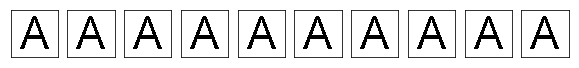

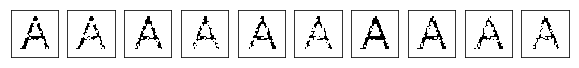

In [472]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 2))
start = 1
end = n+1
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_data[i-1].reshape(dim, dim))
    #plt.imshow(x_data_noisy[i].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


n = 10
plt.figure(figsize=(10, 2))
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_data_noisy[i-1].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [473]:
#Now we have x_data and x_data_noisy we have shuffle it synchronously
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

x_data, x_data_noisy = shuffle_in_unison(x_data, x_data_noisy)

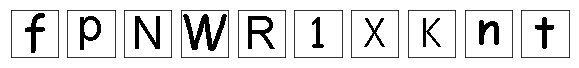

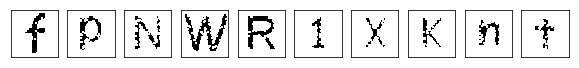

In [474]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 2))
start = 1
end = n+1
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_data[i-1].reshape(dim, dim))
    #plt.imshow(x_data_noisy[i].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


n = 10
plt.figure(figsize=(10, 2))
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_data_noisy[i-1].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [475]:
cut = 2200
x_train = x_data[:cut]
x_test = x_data[cut:]

x_train_noisy = x_data_noisy[:cut]
x_test_noisy = x_data_noisy[cut:]

In [491]:
input_img = Input(shape=(dim, dim, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)
#print(encoded.shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
print(x.shape)

x = UpSampling2D((2, 2))(x)
print(x.shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print(x.shape)

x = UpSampling2D((2, 2))(x)
print(x.shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print(x.shape)

x = UpSampling2D((1, 1))(x)
print(x.shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
print(x.shape)

x = UpSampling2D((1, 1))(x)
print(x.shape)

decoded = Conv2D(1, (2, 2), activation='sigmoid', padding='same')(x)
print(decoded.shape)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(?, 12, 12, 32)
(?, 24, 24, 32)
(?, 24, 24, 32)
(?, 48, 48, 32)
(?, 48, 48, 32)
(?, 48, 48, 32)
(?, 48, 48, 32)
(?, 48, 48, 32)
(?, 48, 48, 1)


In [477]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=500,
                batch_size=16,
                shuffle=True)

Epoch 1/500
2200/2200 [==============================] - 4s 2ms/step - loss: 0.1996
Epoch 2/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0755
Epoch 3/500
2200/2200 [==============================] - 2s 992us/step - loss: 0.0662
Epoch 4/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0620
Epoch 5/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0585
Epoch 6/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0563
Epoch 7/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0550
Epoch 8/500
2200/2200 [==============================] - 2s 997us/step - loss: 0.0527
Epoch 9/500
2200/2200 [==============================] - 2s 998us/step - loss: 0.0512
Epoch 10/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0509
Epoch 11/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0490
Epoch 12/500
2200/2200 [==============================] - 2s 994us/s

2200/2200 [==============================] - 2s 1ms/step - loss: 0.0198
Epoch 192/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0195
Epoch 193/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0197
Epoch 194/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0196
Epoch 195/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0200
Epoch 196/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0191
Epoch 197/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0194
Epoch 198/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0191
Epoch 199/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0195
Epoch 200/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0192
Epoch 201/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0193
Epoch 202/500
2200/2200 [==============================] - 2s 1ms/st

2200/2200 [==============================] - 2s 1ms/step - loss: 0.0152
Epoch 287/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0155
Epoch 288/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0152
Epoch 289/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0152A: 0s - l
Epoch 290/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0156
Epoch 291/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0151
Epoch 292/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0151
Epoch 293/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0150
Epoch 294/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0149
Epoch 295/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0151
Epoch 296/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0150
Epoch 297/500
2200/2200 [==============================] - 

2200/2200 [==============================] - 2s 1ms/step - loss: 0.0125
Epoch 382/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0123
Epoch 383/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0122
Epoch 384/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0122
Epoch 385/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0123
Epoch 386/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0127
Epoch 387/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0120
Epoch 388/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0121
Epoch 389/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0124
Epoch 390/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0121
Epoch 391/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0128
Epoch 392/500
2200/2200 [==============================] - 2s 1ms/st

2200/2200 [==============================] - 2s 1ms/step - loss: 0.0107
Epoch 477/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0106
Epoch 478/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0102
Epoch 479/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0104
Epoch 480/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0106
Epoch 481/500
2200/2200 [==============================] - 3s 1ms/step - loss: 0.0109
Epoch 482/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0102
Epoch 483/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0105
Epoch 484/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0103
Epoch 485/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0099
Epoch 486/500
2200/2200 [==============================] - 2s 1ms/step - loss: 0.0104
Epoch 487/500
2200/2200 [==============================] - 2s 1ms/st

In [478]:
x_test = x_test
x_test_noisy = x_test_noisy
predictions = autoencoder.predict(x_test_noisy)
predictions.shape

(400, 48, 48, 1)

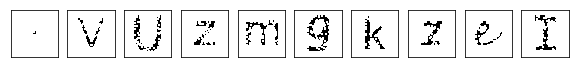

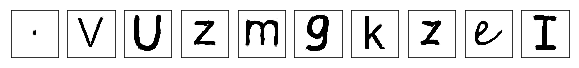

In [479]:
n = 10
plt.figure(figsize=(10, 2))
start = 1
end = n+1
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i-1].reshape(dim, dim))
    #plt.imshow(x_data_noisy[i].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(10, 2))
start = 1
end = n+1
for i in range(start, end):
    ax = plt.subplot(1, n, i)
    plt.imshow(predictions[i-1].reshape(dim, dim))
    #plt.imshow(x_data_noisy[i].reshape(dim, dim))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [489]:
size = 45, 45

for i in range(predictions.shape[0]):
    img = predictions[i]
    imgo = x_test[i]
    imgn = x_test_noisy[i]
    ret,img = cv.threshold(img,0.68, 1, cv.THRESH_BINARY)

    #img = cv.resize(img, dsize=(dim*100,dim*100), interpolation=cv.INTER_CUBIC)
    #img = cv.resize(img, dsize=(dim,dim), interpolation=cv.INTER_CUBIC)
    
    ret, imgo = cv.threshold(imgo,0.90, 1, cv.THRESH_BINARY)
    ret, imgn = cv.threshold(imgn,0.90, 1, cv.THRESH_BINARY)
    
    img = np.concatenate((imgo, imgn, img), axis=1)
#     cv.imwrite("char_"+str(i+1)+"_o.tiff", imgo)
    cv.imwrite("StructureFix_generated_images/char_"+str(i+1)+".tiff", img)